# A/B Testing for ad campaigns

### ShoeFly.com is performing an A/B Test. They have two different versions of an ad, which they have placed in emails, as well as in banner ads on Facebook, Twitter, and Google. They want to know how the two ads are performing on each of the different platforms on each day of the week. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#if ad_click_timestamp is not null, then someone actully clicked on the ad that was displayed
ad_data = pd.read_csv('ad_click.csv')
print(ad_data.head())
print(ad_data.isnull().sum())

                                user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  
0              07:18                  A  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN                  B  
user_id                  0
utm_source               0
day                      0
ad_click_timestamp    1089
experimental_group       0
dtype: int64


### Which ad platform is getting the most views?

In [3]:
pltform_views = ad_data.groupby('utm_source').user_id.count().reset_index().rename(columns={'user_id':'views_count'})
print(pltform_views)
print('  ')

most_views_channel = pltform_views.loc[pltform_views.views_count.idxmax()]
print('{} channel is getting the most views: {}'.format(most_views_channel['utm_source'],most_views_channel['views_count']))




  utm_source  views_count
0      email          255
1   facebook          504
2     google          680
3    twitter          215
  
google channel is getting the most views: 680


### Analyse campaigns click rate

In [4]:
ad_data['is_click'] = ~ad_data.ad_click_timestamp.isnull()

clicks_by_source = ad_data.groupby(['utm_source','is_click']).user_id.count().reset_index().rename(columns={'user_id':'user_count'}).pivot(columns='is_click',index='utm_source',values='user_count').reset_index()

clicks_by_source['percent_clicked'] = clicks_by_source[True] / (clicks_by_source[True] + clicks_by_source[False]) * 100

#print(clicks_by_source.nlargest(1,['percent_clicked']))
max_pct=clicks_by_source.loc[clicks_by_source['percent_clicked'].idxmax()]
print('{} has the largest click rate of {}%'.format(max_pct['utm_source'],max_pct['percent_clicked']))

clicks_by_source

facebook has the largest click rate of 35.714285714285715%


is_click,utm_source,False,True,percent_clicked
0,email,175,80,31.372549
1,facebook,324,180,35.714286
2,google,441,239,35.147059
3,twitter,149,66,30.697674


## Analyzing A/B Test

In [5]:
#column experimental_group tells us whetehr the user was shown Ad A or Ad B

#check whether ads were shown approximately to the same number of people

print(ad_data.groupby('experimental_group').user_id.count())


experimental_group
A    827
B    827
Name: user_id, dtype: int64


Which Ad had the largest % of clicks


In [6]:

a_clicks = ad_data.loc[ad_data.experimental_group == 'A']
b_clicks = ad_data.loc[ad_data.experimental_group == 'B']

#A ad clicks
pivot_a_clicks = a_clicks.pivot_table(columns='is_click', index='day', values= 'user_id',aggfunc=pd.Series.nunique).reset_index()

pivot_a_clicks['day_click_rate'] = pivot_a_clicks[True] / (pivot_a_clicks[True] + pivot_a_clicks[False])*100
highest_click_rate_day_a =  pivot_a_clicks.loc[pivot_a_clicks.day_click_rate.idxmax()]

print('Ad A was most viewed on {} recording a {}% click rate'.format(highest_click_rate_day_a['day'], round(highest_click_rate_day_a['day_click_rate'],1)))


print(pivot_a_clicks)
print('    ')
print('Average click rate for Ad A during the week of {}%'.format(round(pivot_a_clicks.day_click_rate.mean())))
print('    ')
print('-------------------------')
#B ad clicks

pivot_b_clicks = b_clicks.pivot_table(columns='is_click', index='day', values= 'user_id',aggfunc=pd.Series.nunique).reset_index()

pivot_b_clicks['day_click_rate'] = pivot_b_clicks[True] / (pivot_b_clicks[True] + pivot_b_clicks[False])*100
highest_click_rate_day_b =  pivot_b_clicks.loc[pivot_b_clicks.day_click_rate.idxmax()]

print('Ad B was most viewed on {} recording a {}% click rate'.format(highest_click_rate_day_b['day'], round(highest_click_rate_day_b['day_click_rate'],1)))
print('  ')

print(pivot_b_clicks)
print('    ')
print('Average click rate for Ad B during the week of {}%'.format(round(pivot_b_clicks.day_click_rate.mean())))

Ad A was most viewed on 4 - Thursday recording a 40.5% click rate
is_click            day  False  True  day_click_rate
0            1 - Monday     70    43       38.053097
1           2 - Tuesday     76    43       36.134454
2         3 - Wednesday     86    38       30.645161
3          4 - Thursday     69    47       40.517241
4            5 - Friday     77    51       39.843750
5          6 - Saturday     73    45       38.135593
6            7 - Sunday     66    43       39.449541
    
Average click rate for Ad A during the week of 38%
    
-------------------------
Ad B was most viewed on 2 - Tuesday recording a 37.8% click rate
  
is_click            day  False  True  day_click_rate
0            1 - Monday     81    32       28.318584
1           2 - Tuesday     74    45       37.815126
2         3 - Wednesday     89    35       28.225806
3          4 - Thursday     87    29       25.000000
4            5 - Friday     90    38       29.687500
5          6 - Saturday     76    42 

In [7]:
pivot_a_clicks[['day_no','day_name']] = pivot_a_clicks.day.str.split(' - ', expand=True)
pivot_a_clicks['day_no']=pd.to_numeric(pivot_a_clicks.day_no)
#print(pivot_a_clicks.dtypes)

pivot_b_clicks[['day_no','day_name']] = pivot_b_clicks.day.str.split(' - ', expand=True)
pivot_b_clicks['day_no']=pd.to_numeric(pivot_b_clicks.day_no)
#print(pivot_b_clicks.dtypes)


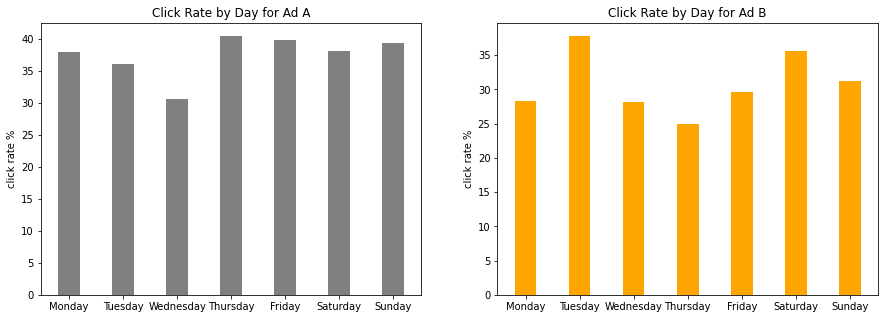

The average click rate for Ad A during the week was 38% whereas ad B captured a click rate of 31%.
Ad A recorded the highest clicked rate on 4 - Thursday with a 40.5% click rate, whereas Ad B click rate peaked on 2 - Tuesday with 37.8%
Based on the overall and average click rate per day, Ad A should be used


In [14]:
ad_list = list(ad_data.experimental_group.unique())
click_rate = [pivot_a_clicks['day_click_rate'], pivot_b_clicks['day_click_rate']]
plt.figure(figsize = (15,5))
plt.subplots_adjust(hspace = 0.35)
color = ['grey','orange']
x = 1

for ad in ad_list:
    plt.subplot(1, 2, x)
    plt.bar(pivot_a_clicks['day_no'], click_rate[x-1], width=0.4, color= color[x-1])
    plt.xticks(pivot_a_clicks['day_no'], pivot_a_clicks['day_name'])
    plt.title('Click Rate by Day for Ad {}'.format(ad))
    plt.ylabel('click rate %')
    x +=1
plt.show()

print('The average click rate for Ad A during the week was {}% whereas ad B captured a click rate of {}%.'.format(round(pivot_a_clicks.day_click_rate.mean()),round(pivot_b_clicks.day_click_rate.mean())))

print('Ad A recorded the highest clicked rate on {} with a {}% click rate, whereas Ad B click rate peaked on {} with {}%'.format(highest_click_rate_day_a['day'], round(highest_click_rate_day_a['day_click_rate'],1),highest_click_rate_day_b['day'], round(highest_click_rate_day_b['day_click_rate'],1)))

print('Based on the overall and average click rate, Ad A should be rolled out.') 